<a href="https://colab.research.google.com/github/ashleyfeng1/LTGK/blob/main/Aristotle_Metaphysics_Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import csv
import collections
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [213]:
!wget https://raw.githubusercontent.com/ashleyfeng1/LTGK/main/Metaphysics%20-%20983b-986b.csv

--2022-03-16 05:18:06--  https://raw.githubusercontent.com/ashleyfeng1/LTGK/main/Metaphysics%20-%20983b-986b.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550 [text/plain]
Saving to: ‘Metaphysics - 983b-986b.csv.10’

Metaphysics - 983b- 100%[===================>]     550  --.-KB/s    in 0s      

2022-03-16 05:18:06 (10.9 MB/s) - ‘Metaphysics - 983b-986b.csv.10’ saved [550/550]



In [214]:
csv_file = 'Metaphysics - 983b-986b.csv'

In [215]:
edges_G, edges_H = set(), set()

with open('Metaphysics - 983b-986b.csv') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
    edges_G.add((row['Philosopher'], row['Cause']))
    edges_H.add((row['Cause'], row['Category']))

print(edges_G)
print(edges_H)

{('Empedocles', 'air'), ('Empedocles', 'water'), ('Xenophanes', 'the One'), ('Empedocles', 'fire'), ('Empedocles', 'earth'), ('Anaxagoras', 'infinite principles'), ('Leucippus', 'being and non-being'), ('Alcmaeon', 'contraries'), ('Heraclitus', 'fire'), ('Pythagoras', 'numbers'), ('Parmenides', 'the One'), ('Melissus', 'the One'), ('Thales', 'water'), ('Anaximenes', 'air'), ('Diogenes', 'air'), ('Democritus', 'being and non-being')}
{('fire', 'material'), ('earth', 'material'), ('infinite principles', 'material'), ('being and non-being', 'material'), ('contraries', 'intangible'), ('air', 'material'), ('the One', 'material'), ('the One', 'intangible'), ('water', 'material'), ('numbers', 'intangible')}


In [231]:
G = nx.Graph()
source_nodes_G = set([edge[0] for edge in edges_G])
G.add_edges_from(edges_G)
for n in G.nodes():
  G.nodes[n]['color'] = 'orange' if n in source_nodes_G else 'gold'

In [232]:
H = nx.Graph()

In [233]:
H.add_nodes_from(G)
H.add_edges_from(G.edges)

In [234]:
source_nodes_H = set([edge[0] for edge in edges_H])
H.add_edges_from(edges_H)
for n in H.nodes():
  H.nodes[n]['color'] = 'orange' if n in source_nodes_H else 'gold'

In [235]:
list(H.nodes(data=True))

[('Empedocles', {'color': 'gold'}),
 ('air', {'color': 'orange'}),
 ('water', {'color': 'orange'}),
 ('Xenophanes', {'color': 'gold'}),
 ('the One', {'color': 'orange'}),
 ('fire', {'color': 'orange'}),
 ('earth', {'color': 'orange'}),
 ('Anaxagoras', {'color': 'gold'}),
 ('infinite principles', {'color': 'orange'}),
 ('Leucippus', {'color': 'gold'}),
 ('being and non-being', {'color': 'orange'}),
 ('Alcmaeon', {'color': 'gold'}),
 ('contraries', {'color': 'orange'}),
 ('Heraclitus', {'color': 'gold'}),
 ('Pythagoras', {'color': 'gold'}),
 ('numbers', {'color': 'orange'}),
 ('Parmenides', {'color': 'gold'}),
 ('Melissus', {'color': 'gold'}),
 ('Thales', {'color': 'gold'}),
 ('Anaximenes', {'color': 'gold'}),
 ('Diogenes', {'color': 'gold'}),
 ('Democritus', {'color': 'gold'}),
 ('material', {'color': 'gold'}),
 ('intangible', {'color': 'gold'})]

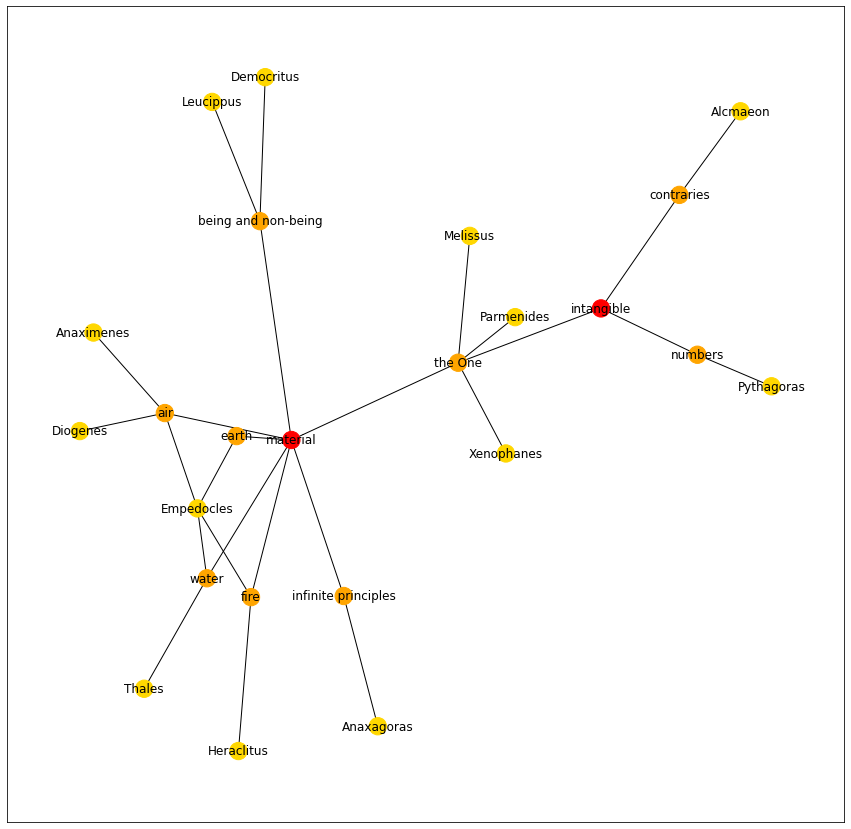

In [237]:
fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=1, iterations=400)
colors = [node[1]['color'] for node in H.nodes(data=True)]
nx.draw_networkx(H, pos, with_labels=True, node_color=colors)
H.nodes['material']['color'] = 'red'
H.nodes['intangible']['color'] = 'red'
plt.show()